In [1]:
%matplotlib inline
# import dependencies
import requests
import json
from pprint import pprint
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')

import scipy.stats as stats

# connect to API key
ckey = "c3c7837f76a061a6b169ca1e0b35db71ba2b26c3"

In [2]:
# read zip codes csv
zipcodes_data = "clean_nyc_zips.csv" 
zipcodes_df = pd.read_csv(zipcodes_data)
zipcodes_df.head()

,NYC_Zip_Codes
0,10001
1,10002
2,10003
3,10004
4,10005


In [3]:
# Add columns for income
zipcodes_df["Avg Income ($)"] = ""


zipcodes_df.head()

,NYC_Zip_Codes,Avg Income ($)
0,10001,
1,10002,
2,10003,
3,10004,
4,10005,


In [4]:
fine_dine_df = pd.read_csv("mich_rests.csv")
income_zip_df = pd.read_csv("zips_with_income.csv")
fine_dine_df.head()

,Unnamed: 0,name,address,city,state,description,star,full_address,postal_code
0,1,Sushi Inoue,381 Lenox Ave,New York,NY,ONE STAR for this Japanese restaurant in Harlem.,1,"381 Lenox Ave, New York, NY 10027",10027
1,2,Dovetail,103 W 77th St,New York,NY,John Fraser's UWS fine dining restaurant has O...,1,"103 W 77th St, New York, NY 10024",10024
2,3,Cafe Boulud,20 E 76th St,New York,NY,Daniel Boulud's beloved Upper East Side restau...,1,"20 E 76th St, New York, NY 10021",10021
3,4,Jean-Georges,1 Central Park West,New York,NY,Jean-Georges Vongerichten's flagship restauran...,2,"1 Central Park West, New York, NY 10023",10023
4,5,Masa,10 Columbus Cir,New York,NY,Masa Takayama's pricey sushi restaurant has TH...,3,"10 Columbus Cir, New York, NY 10019",10019


In [5]:
postal_group = fine_dine_df.groupby('postal_code')

count_postal = postal_group['postal_code'].count()

count_restaurants_df = count_postal.rename_axis('NYC_Zip_Codes').reset_index(name='Michelin Counts')
count_restaurants_df.head()



,NYC_Zip_Codes,Michelin Counts
0,10001,2
1,10002,2
2,10003,7
3,10009,1
4,10010,4


In [6]:
# Merge two dataframes using an inner join
merge_table = pd.merge(income_zip_df, count_restaurants_df, on="NYC_Zip_Codes",how = "left")
merge_table.fillna(0)


merge_table = merge_table.fillna(0)

merge_table.head()


,NYC_Zip_Codes,Avg Income ($),Michelin Counts
0,10001,161227.0,2.0
1,10002,65718.0,2.0
2,10003,182531.0,7.0
3,10004,191760.0,0.0
4,10005,201734.0,0.0


In [7]:
#merge_table.iloc[4,0]

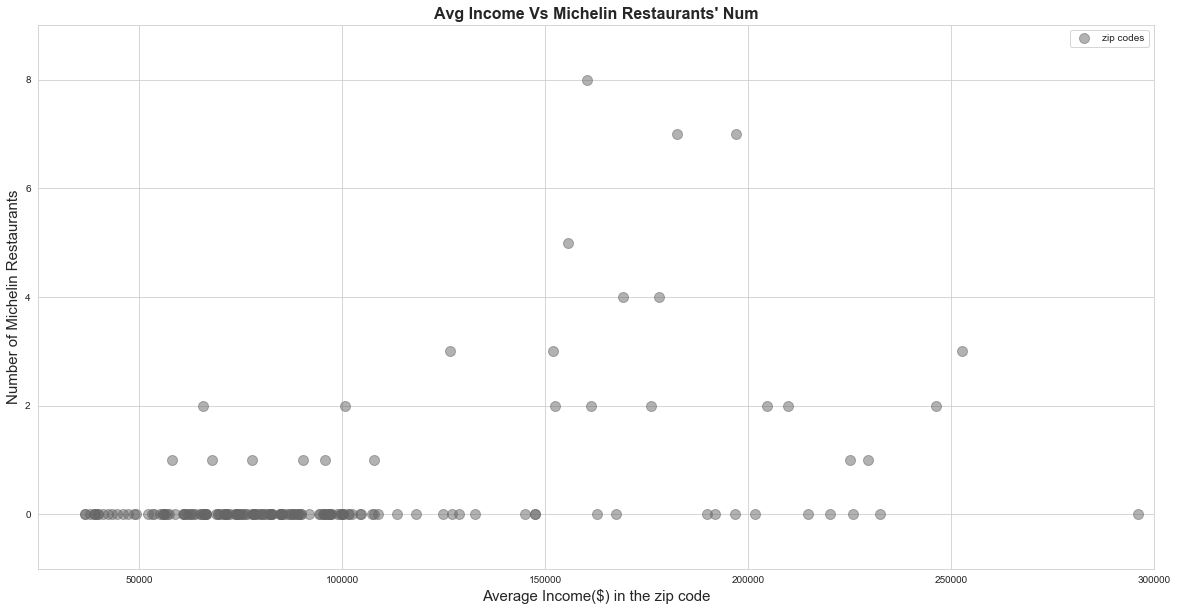

In [11]:
income = merge_table['Avg Income ($)']
rest_count = merge_table['Michelin Counts']
plt.figure(figsize=(20,10))
plt.plot(income, rest_count, 'o', color= '#666666', alpha=.5, label='zip codes', markersize=10)
#plt.plot(income, intercept + slope*(rest_count), color='#00CC99', label='fitted line')
plt.legend()

plt.ylim(-1, 9)
plt.xlim(25000, 300000)

# Create a title, x label, and y label for our chart
plt.title("Avg Income Vs Michelin Restaurants' Num",fontsize= 16,fontweight = "bold")
plt.xlabel("Average Income($) in the zip code",fontsize= 15)
plt.ylabel("Number of Michelin Restaurants", fontsize = 15)


plt.savefig("../JoeImages/Income_V_Finerestaurants.png")
plt.show()





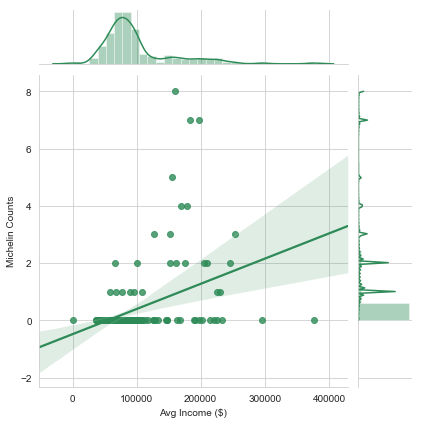

In [23]:
sns.jointplot(income, rest_count,kind = "reg", color="seagreen")
plt.savefig("../JoeImages/Income_V_Finerestaurants_regression.png")
plt.show()

6.414743634739686e-08


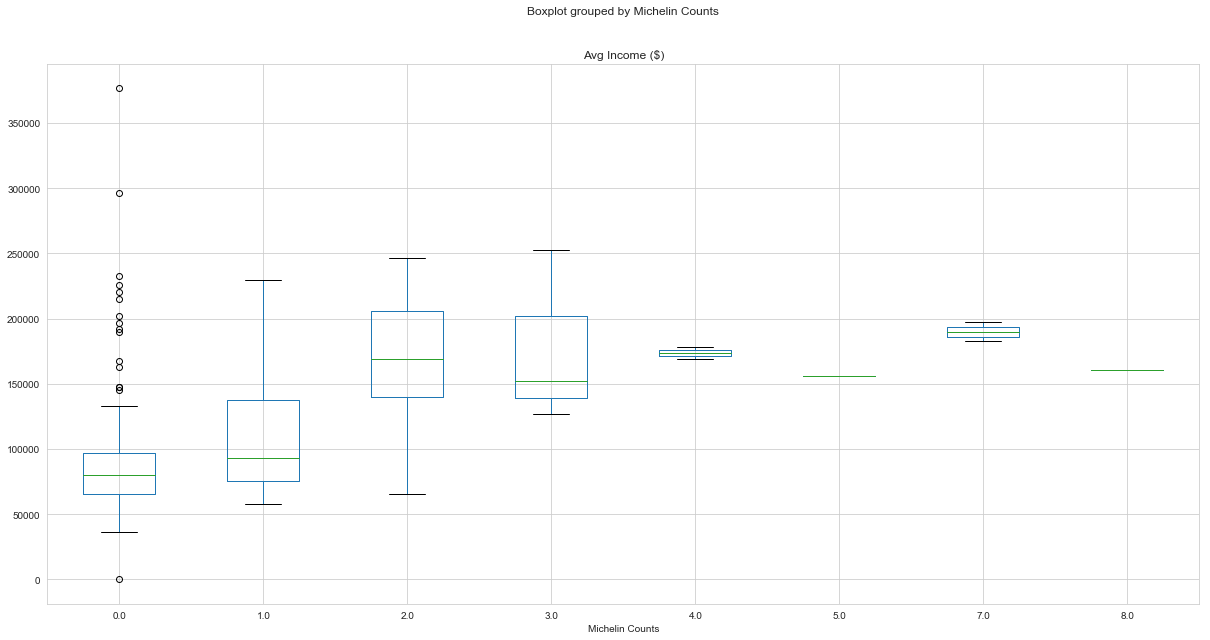

In [25]:
merge_table.boxplot("Avg Income ($)", by="Michelin Counts", figsize=(20, 10))
plt.savefig("../JoeImages/Income_V_Finerestaurants_box.png")
# calculate P value
slope, intercept, r_value, p_value, std_err = stats.linregress(income, rest_count)
print(p_value)